# Graphing with Matplotlib but styling like ggplot2

An overview of how to use Python matplotlib for data visualization, using temperature and greenhouse gas data from NASA.



# About the data


This repo contains two data files:

- [data/nasa-ghgases.csv](data/nasa-ghgases.csv) -- NASA CO2 measurements from 1850 to 2011
- [data/nasa-gistemp.csv](data/nasa-gistemp.csv) -- NASA temperature measurements from 1880 to 2015



The data comes from NASA and was extracted (using regex -- we'll show those tricks in another notebook) from the following source text files:

via [GISS Climate Model](http://data.giss.nasa.gov/modelforce/ghgases/):

[http://data.giss.nasa.gov/modelforce/ghgases/Fig1A.ext.txt](http://data.giss.nasa.gov/modelforce/ghgases/Fig1A.ext.txt)

        Year,MixR
        1850,285.2
        1851,285.1
        1852,285.0
        2009,386.95
        2010,389.21
        2011,391.15

via [GISS Surface Temperature Analysis](http://data.giss.nasa.gov/gistemp/graphs_v3/):

[http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A.txt](http://data.giss.nasa.gov/gistemp/graphs_v3/Fig.A.txt)

        Year,Annual_Mean,5-year_Mean
        1880,-0.49,
        1881,-0.47,
        1882,-0.38,-0.48
        2013,0.84,0.87
        2014,0.90,
        2015,1.01,


## Initialize the defaults and import the libraries

In [14]:
%matplotlib inline
# only necessary for notebook mode
from csv import DictReader
import matplotlib.pyplot as plt
from os.path import join
DATA_DIR = 'data'
CO2_DATAFILE = join('data', 'nasa-ghgases.csv')
TEMP_DATAFILE = join('data', 'nasa-gistemp.csv')

## Load the data

To keep things relatively slim, we won't be using Pandas to load the data files into dataframes. Instead, we'll use good ol `csv.DictReader`. Note that the loading of the temp data gets messy because there are missing values for the `5-year_Mean` columns...so, yes, in reality, you should be using pandas to deal with that. But this data is simple enough to load via standard Python techniques.


In [15]:
# load the gas data
with open(CO2_DATAFILE, 'r') as f:
    data = list(DictReader(f))
    gas_years = [int(d['Year']) for d in data]
    gas_vals = [float(d['MixR']) for d in data]
    
    
# load the temp data
with open(TEMP_DATAFILE, 'r') as f:
    data = list(DictReader(f))
    temp_years = [int(d['Year']) for d in data]
    temp_annual_means = [float(d['Annual_Mean']) for d in data]
    temp_5yr_years = []
    temp_5yr_means = []
    for d in data:
        if d['5-year_Mean']:            
            temp_5yr_years.append(int(d['Year']))
            temp_5yr_means.append(float(d['5-year_Mean']))

    

# Matplotlib barebone default styling

Before we get into matplotlib's many styling and configuration options, let's see what its defaults can create for us.

### Basic line chart

### Basic bar chart

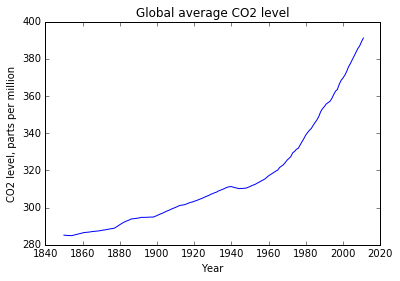

In [16]:
fig_gas, ax_gas = plt.subplots()
ax_gas.plot(gas_years, gas_vals)
ax_gas.set_xlabel('Year')
ax_gas.set_ylabel('CO2 level, parts per million')
ax_gas.set_title('Global average CO2 level')

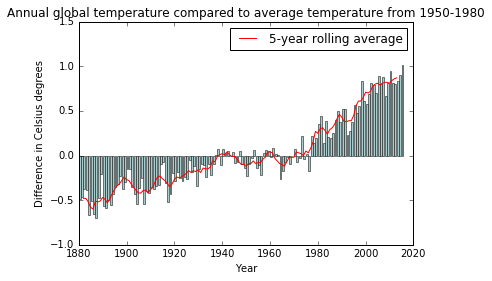

In [40]:
fig_temp, ax_temp = plt.subplots()
ax_temp.bar(temp_years, temp_annual_means, color='#aacccc', linewidth=0.5)
line_5yr_means = ax_temp.plot(temp_5yr_years, temp_5yr_means, color='red', 
                         linewidth=1, label='5-year rolling average')
ax_temp.set_ylabel('Difference in Celsius degrees')
ax_temp.set_xlabel('Year')
ax_temp.set_title("Annual global temperature compared to average temperature from 1950-1980")
ax_temp.legend(handles=line_5yr_means);

# Using matplotlib stylesheets to emulate ggplot2 look

[matplotlib: Customizing plots with style sheets](http://matplotlib.org/users/style_sheets.html)

As it turns out, matplotlib comes with a stylesheet named `'ggplot'`; how convenient!


We can use the "temporary styling" pattern so that the `"ggplot"` stylesheet doesn't globally change every other plot:


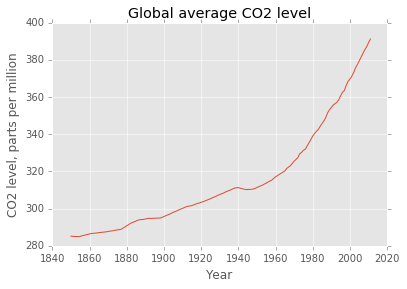

In [35]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    ax.plot(gas_years, gas_vals)
    ax.set_xlabel('Year')
    ax.set_ylabel('CO2 level, parts per million')
    ax.set_title('Global average CO2 level')


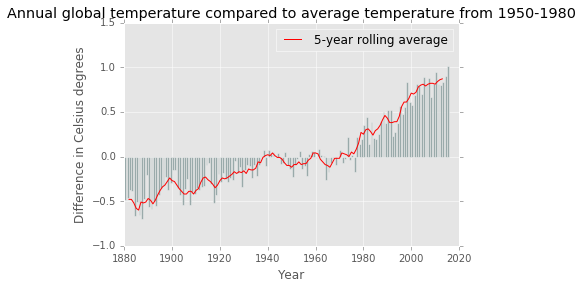

In [38]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots()
    ax.bar(temp_years, temp_annual_means, color='#99AAAA', linewidth=0.5)
    line_5yr_means = ax.plot(temp_5yr_years, temp_5yr_means, color='red', 
                             linewidth=1, label='5-year rolling average')
    ax.set_ylabel('Difference in Celsius degrees')
    ax.set_xlabel('Year')
    ax.set_title("Annual global temperature compared to average temperature from 1950-1980")
    ax.legend(handles=line_5yr_means);

# TK: Creating ggplot2 look from scratch 
